# Exercise 1

In [1]:
install.packages("geometry")
install.packages("gridExtra")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library("gridExtra", warn.conflicts=FALSE)
#needed for dot produc
library(geometry)

1.1) write the R probability functions for the probability density and cumulative distribution functions,
following the R naming convention

In [3]:
#Custom PDF function

dpk <- function(k) {
    ifelse (k %in% seq(1:5), k/15, 0) 
}

#Custom CDF function

ppk <- function(k) {
    ifelse(k<1,0 , ifelse(k>=5, 1, sapply(k, function(x) sum(dpk(1:floor(x))))))
}


1.2) produce two plots showing the pdf and cdf, separately

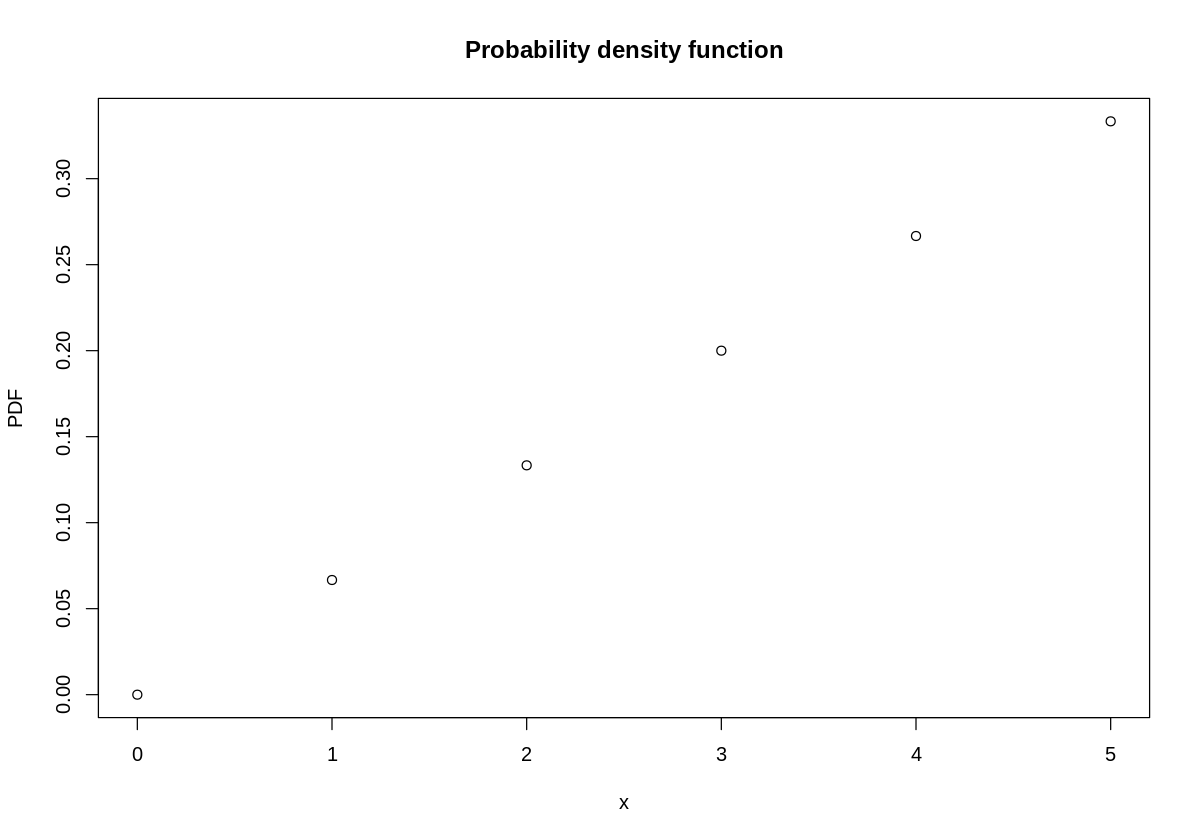

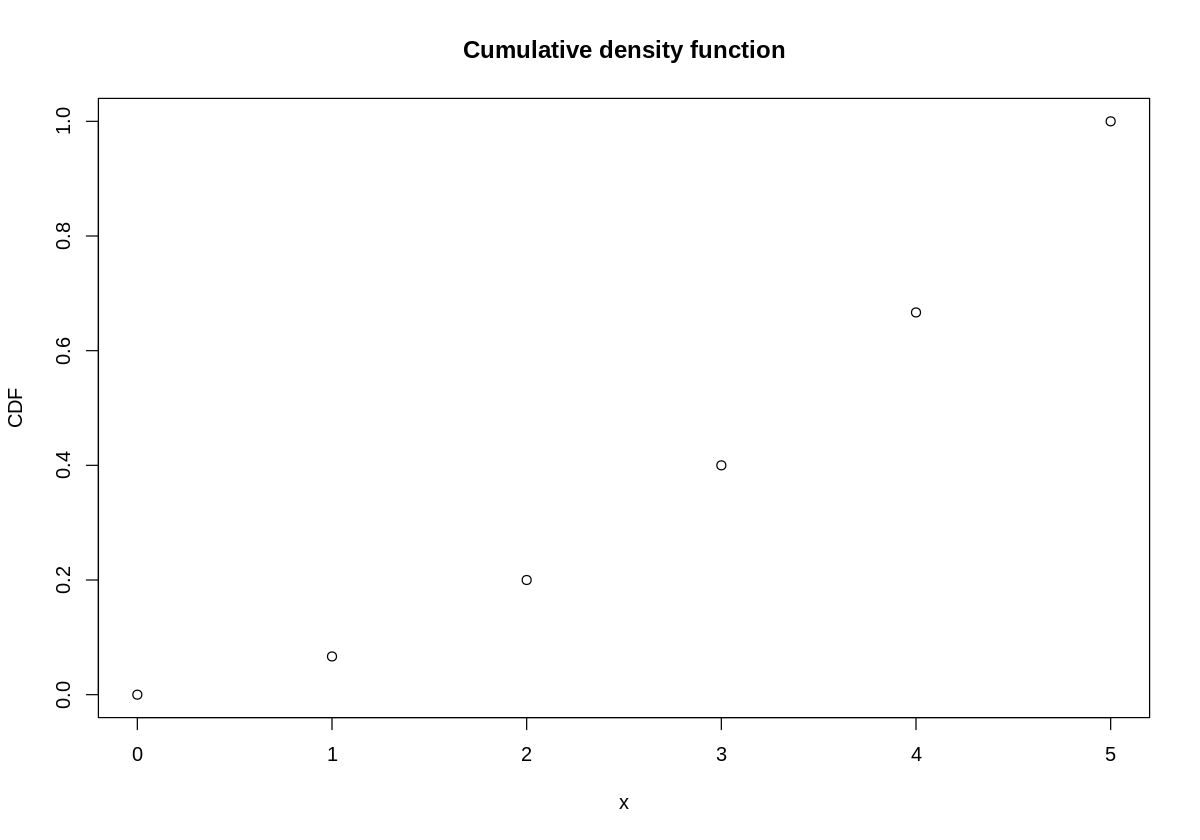

In [4]:
options(repr.plot.width=10, repr.plot.height=7)

# need to define the variables to plot BEFORE calling the plot function
x <- 0:5
density <- dpk(x)
pdf <- plot(x , density, main= "Probability density function", ylab= "PDF")

cumulative <- ppk(x)
cdf <- plot(x, cumulative, main= "Cumulative density function", ylab= "CDF")


1.3) compute, using R, the mean value and variance of the probability distribution


In [5]:
mean = mean(density)
var = var(density)

cat(mean, var)

0.1666667 0.01555556

1.4) compute, using R, the expected value E [k (6 − k)]

In [6]:
expected = dot(x * (6-x), density)
cat(expected)

7

1.5) write the R function that allows to sample random numbers from the probability distribution

In [7]:
rpk = function(n){

    # Use inverse transform sampling method
    # Sample from a uniform distribution 
    u = runif(n)
    
    # find the smaller i s.t. ppk(i-1) < u < ppk(i)
    is = rep(1, n)
    for (j in 1:length(u)){
        i = 1
        while (ppk(i) < u[j]) i = i + 1
        is[j] = i
    }
    return(is)
}

1.6)  using the implemented function (point (5)), sample 10^5 random numbers from this distribution and plot them in a graph showing the distribution of the numbers superimposed to the pdf (normalize properly the plots with random numbers)

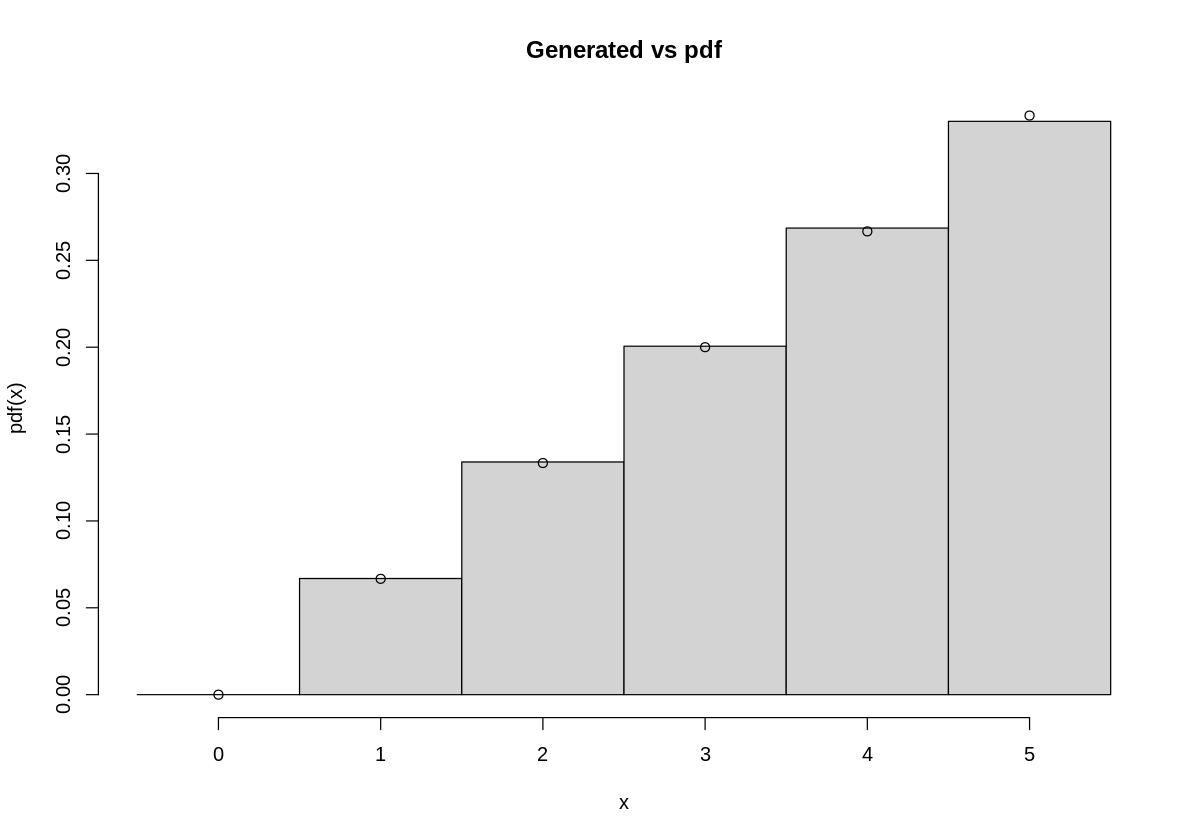

In [8]:
random = rpk(100000)

#plot histogram
hist(random, breaks=seq(min(x)-0.5, max(x)+0.5, by=1), freq=FALSE, xlab='x', ylab='pdf(x)', main='Generated vs pdf')
#superimpose points
points(x=x, y=density)

# Exercise 2

2.1) plot the function, given the interval (a, b)

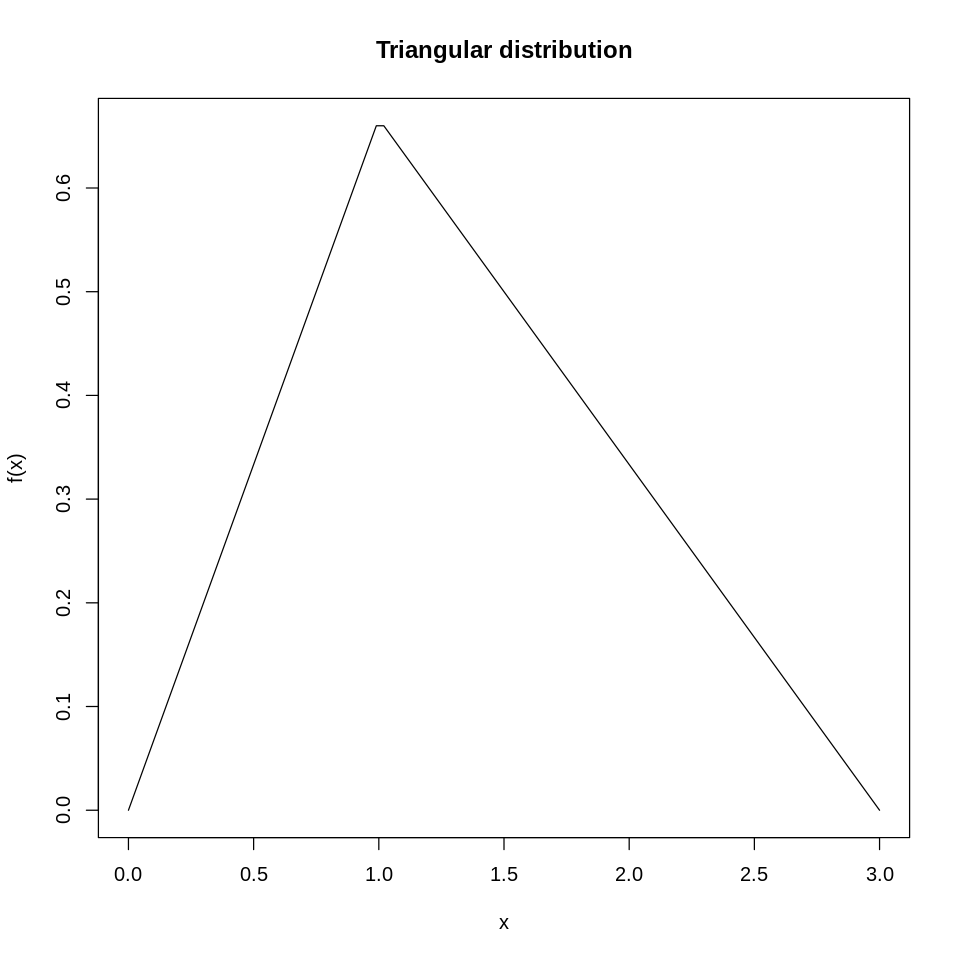

In [9]:
dtr = function(x, a, b, c){
    ifelse(x >= a & x < c,  2*(x - a)/((b - a)*(c - a)), 
    ifelse(x >= c & x <= b, 2*(b - x)/((b - a)*(b - c)), 
    0))
}

#Given values
a = 0
b = 3
c = 1

options(repr.plot.width=8, repr.plot.height=8)
curve(dtr(x, a=a, b=b, c=c), from = a, to = b, xlab = "x", ylab = "f(x)", main = "Triangular distribution")

2.2) and write an algorithm to generate random numbers from the triangular distribution

In [10]:
rtr = function(n, a, b, c){
    
    u = runif(n)
    
    #formula for the inverse distribution was calculated by hand 
    random = ifelse(u <= (c-a)/(b-a), a + sqrt(u * (b-a) * (c-a) + a^2),
                                      b - sqrt((b - c) * (b - a) * (1 - u)))
    return (random)
}

2.3) generate 10^4 random number from the distribution, show them in an histogram and superimpose the analytical curve

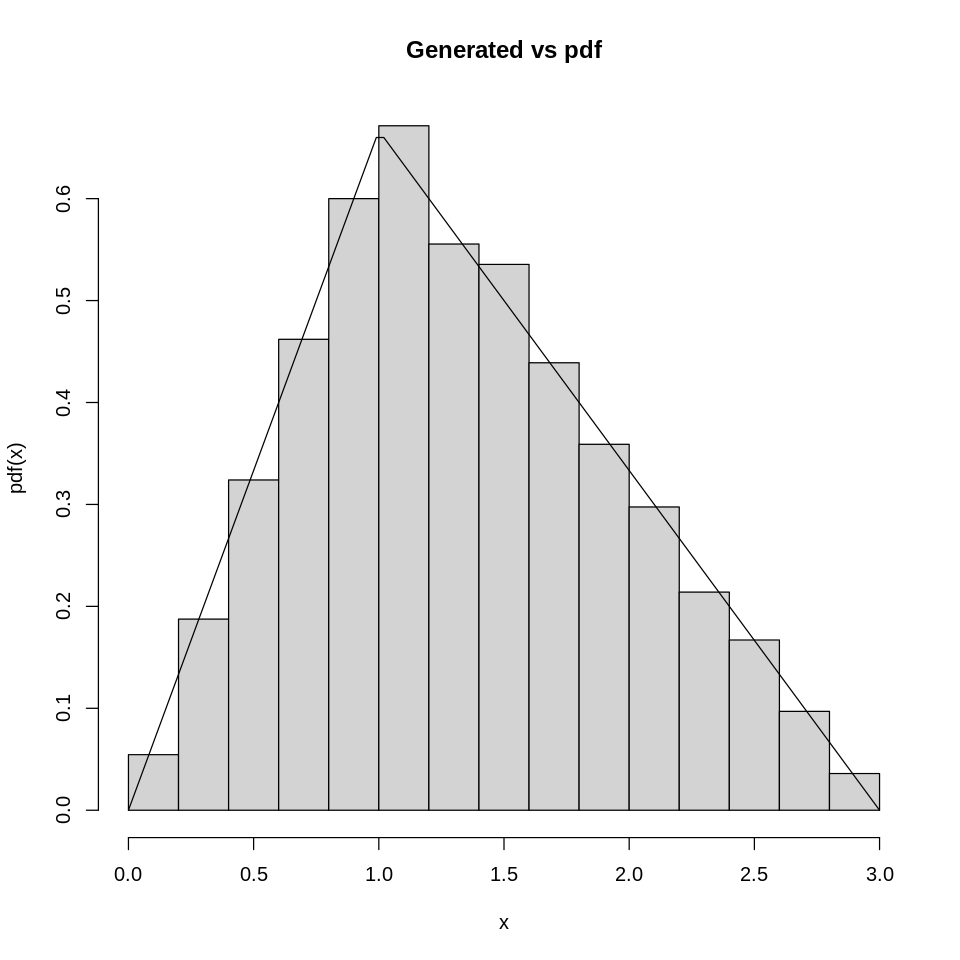

In [11]:
randomtr = rtr(10000, a, b, c)

hist(randomtr, freq=FALSE, xlab='x', ylab='pdf(x)', main='Generated vs pdf')
curve(dtr(x, a=a, b=b, c=c), from = a, to = b, add=TRUE)

# Exercise 3

The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30

- simulate the waiting time for 60 people at the doctor’s office and plot the relative histogram

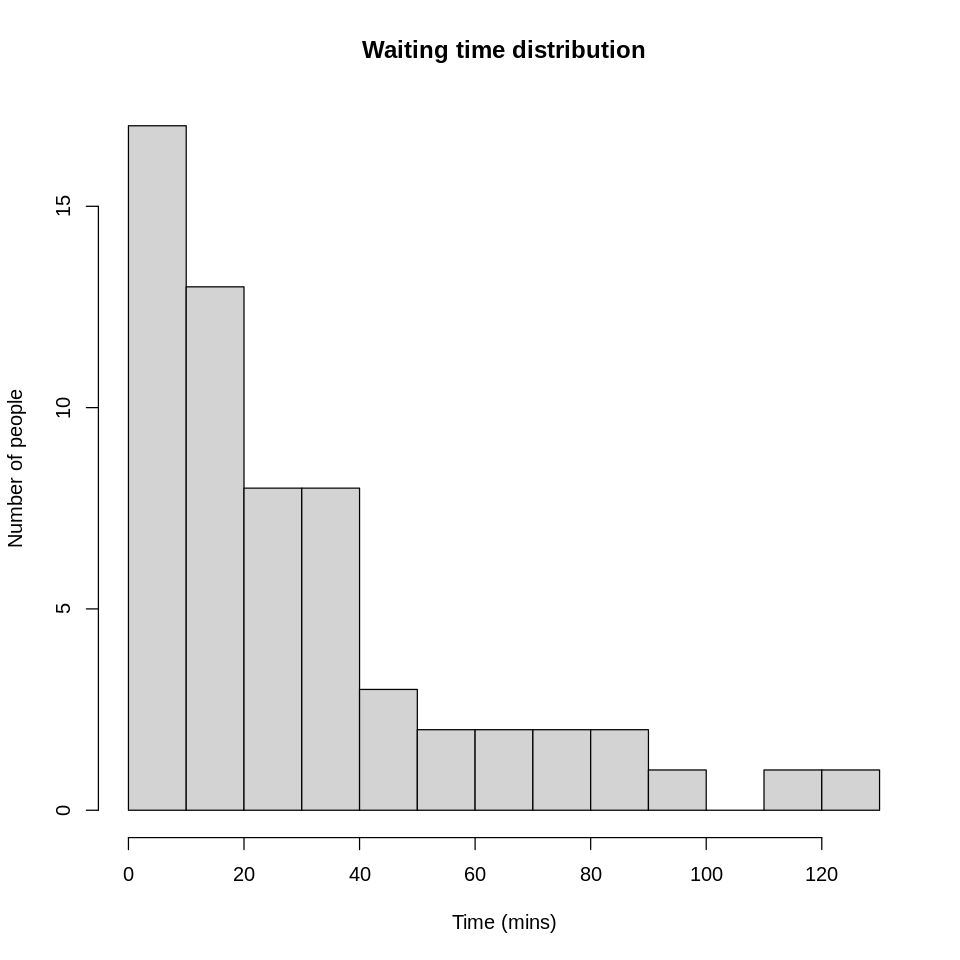

In [12]:
people = 60
rate   = 1/30

# generate the waiting time for all the people
waiting  = rexp(n = people, rate = rate)

hist(waiting, breaks = 15, xlab = 'Time (mins)', ylab = 'Number of people', main = 'Waiting time distribution')

- what is the probability that a person will wait for less than 12 minutes ?

In [16]:
# number of people that waited less than 12 mins/total number of people
p12 = length(waiting[waiting < 12] ) / people

print(p12)

[1] 0.3333333


- evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)


In [17]:
th_ave  = 30
sim_ave = mean(waiting)

# calculate the Expected value 
man_calc_ave = integrate(function(x) x* dexp(x, rate=rate), lower=0, upper=Inf)

cat("Theoretical average\t", th_ave, "\nSimulated average\t", sim_ave, "\nAverage from dexp\t", man_calc_ave$value)

Theoretical average	 30 
Simulated average	 29.35588 
Average from dexp	 30

- what is the probability for waiting more than one hour before being received ?

In [18]:
p60 = length(waiting[waiting > 60] ) / people

print(p60)

[1] 0.15


# Exercise 4

The final exam of a course is given to the students in the format of a multiple choice written test: for each questions there are five possible alternatives:
- a student either knows the answer, or selects randomly the answer among the five possible choices
- assuming p = 0.7 the probability that the student knows the answer, once a correct answer is given, what it the probability that the student really knew the correct answer ?
- write a small R program to provide the answer


In [19]:
# Here the analytical solution is provided

p_K = 0.7
p_R = 0.3
p_C_given_K = 1
p_C_given_R = 1/5

p_C = p_C_given_K * p_K + p_C_given_R * p_R

# Bayes theorem
p_K_given_C = p_C_given_K * p_K / p_C

cat(p_K_given_C)

0.9210526

# Exercise 5

Starting from 5:00 in the morning, every half an hour there is a train from Milano Centrale to Roma Termini. We assume there is always an available seat on a train leaving from Milano.
Assuming a person arrives at a random time between 10:45 and 11:45 and compute the probability that she has to wait

In [20]:
# define the arrival time range (dummy date to make it work)
arrival_time <- seq(from = as.POSIXct("2023-04-22 10:45:00"), 
                    to = as.POSIXct("2023-04-22 11:45:00"), 
                    by = "min")

# define the train schedule
train_schedule <- seq(from = as.POSIXct("2023-04-22 10:00:00"), 
                      to = as.POSIXct("2023-04-22 12:00:00"), 
                      by = "30 min")

# Compute the waiting time for each arrival time
waiting_time <- sapply(arrival_time, function(x) min(train_schedule[train_schedule > x]) - x)

- at most 10 minutes

In [21]:
p10 = length(waiting_time[waiting_time <= 10]) / length(waiting_time)
print(p10)

[1] 0.3278689


- at least 15 minutes


In [22]:
p15 = length(waiting_time[waiting_time >= 15]) / length(waiting_time)
print(p15)

[1] 0.5409836


- what is the average time spent waiting ?

In [23]:
ave = mean(waiting_time)
print(ave)

[1] 15.4918


# Exercise 6

- the annual return rate for a specific stock on the market is a normal variable with a 10% mean and a 12% standard deviation
- Mr X decides to buy 200 share of that specific stock at a price of 85€ per share
- what is the probability that after a year his net profit from the investment is at least 800€ ?
- (suppose there are no transaction costs and that there are no annual dividend for the stock)

In [24]:
mean = 10
std  = 12

stock_val  = 85
n_stocks   = 200
investment = stock_val * n_stocks

req_profit = 800

# capital after one year
new_val    = investment + req_profit

# total annual return rate
tot_return = req_profit / new_val * 100

# we calculate the required probability integrating the pdf from the minimum return required to infinity
p = integrate(function(x) dnorm(x, mean = mean, sd = std), lower=tot_return, upper=Inf)
              
print(p)

0.6768116 with absolute error < 3e-05
